In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [25]:
time_data = pd.read_excel("data/time_2019.xlsx", header=3, index_col=0, sheet_name=None)
time_data.keys()

dict_keys(['Table 2A', 'Table 2B', 'Table 2C', ' Table 2D', ' Table 2E', 'Parameters'])

In [26]:
fatal_crashes = time_data["Table 2B"].astype(float)
fatal_crashes = fatal_crashes.drop(index=['A.M. Total', 'P.M. Total', 'Unknown hour', 'Total'])
fatal_crashes.index = np.arange(24)

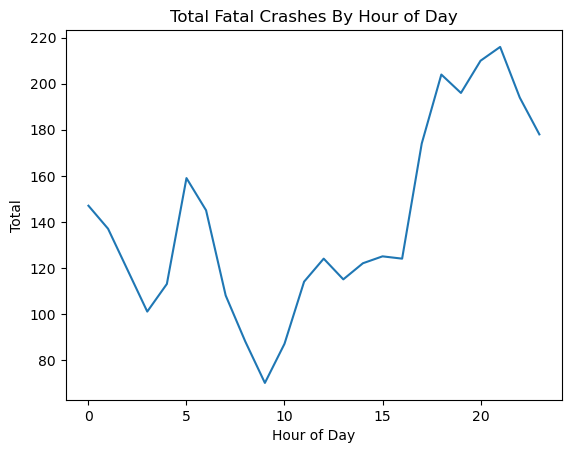

In [27]:
ax = sns.lineplot(fatal_crashes['Total'])
ax.set(xlabel='Hour of Day', ylabel='Total', title='Total Fatal Crashes By Hour of Day')

plt.show()

Looking at the graph above, we see that the peak number of fatal crashes is late at night near 9:00 PM, which could be the result of reckless driving during the night when people may have a harder time seeing. 

The lowest peak in the graph lies around 9:00 AM, which could be the result of traffic jams where people are unable to drive recklessly. 

In [28]:
injury_crashes = time_data['Table 2C'].astype(float)
injury_crashes = injury_crashes.drop(
    index=['A.M. Total', 'P.M. Total', 'Unknown hour', 'Total'],
    columns="Total")
injury_crashes.index = np.arange(24)
injury_crashes.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,428.0,339.0,352.0,398.0,380.0,639.0,775.0
1,366.0,260.0,266.0,292.0,303.0,680.0,789.0
2,334.0,222.0,243.0,294.0,346.0,729.0,778.0
3,236.0,196.0,202.0,234.0,250.0,443.0,529.0
4,274.0,276.0,291.0,279.0,271.0,383.0,388.0


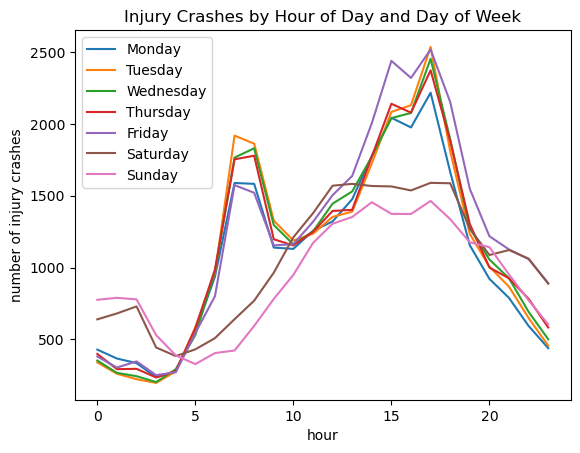

In [29]:
plt.plot(injury_crashes, label=injury_crashes.columns)
plt.xlabel("hour")
plt.ylabel("number of injury crashes")
plt.title("Injury Crashes by Hour of Day and Day of Week")
plt.legend()
plt.show()

We see that weekdays have very similar patterns, with peaks at major commute times in the morning at around 7-8 AM, and in the afternoon around 5 PM, which is also just the peak commute times due to people's 9-5 jobs. However, we notice that Mondays and Fridays seem to have lower number of injury crashes in the morning, perhaps because there is less traffic closer to the weekend. Friday also seems to have more crashes in the afternoon, which could be due to drivers' fatigue or rush to get home early for the weekend.

The weekend injury crashes pattern also seems to reflect the average person's travel patterns. It seems most people go out later and return home later on weekends, but on average there seem to be fewer crashes since there are fewer cars on the road.

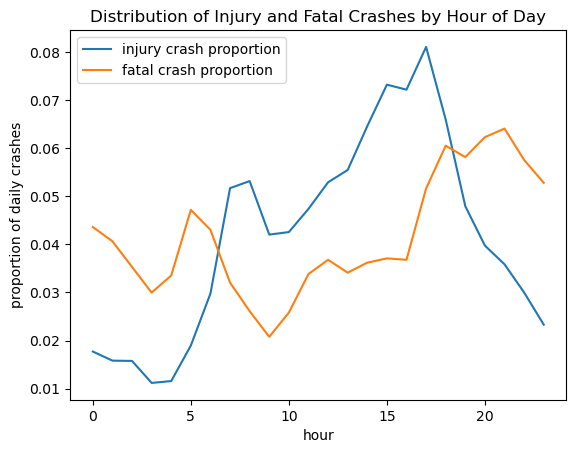

In [30]:
injury_totals = time_data['Table 2C']['Total'].astype(float)
fatal_totals = time_data["Table 2B"]['Total'].astype(float)

injury_totals = injury_totals.drop(
    index=['A.M. Total', 'P.M. Total', 'Unknown hour', 'Total'])
fatal_totals = fatal_totals.drop(
    index=['A.M. Total', 'P.M. Total', 'Unknown hour', 'Total'])

injury_prop = injury_totals / np.sum(injury_totals)
fatal_prop = fatal_totals / np.sum(fatal_totals)

plt.plot(np.arange(24), injury_prop, label="injury crash proportion")
plt.plot(np.arange(24), fatal_prop, label="fatal crash proportion")

plt.xlabel("hour")
plt.ylabel("proportion of daily crashes")
plt.title("Distribution of Injury and Fatal Crashes by Hour of Day")

plt.legend()
plt.show()

Interestingly, we see that fatal crashes and injury crashes do not have peaks at the same time. Injury crashes seem to occur around peak commute times, but fatal crashes are slightly offset from these peaks (earlier in the morning, and later in the afternoon). This is likely because heavy traffic jams and slow speeds make it more unlikely that a crash would result in a fatality.

### Comparing Daily Trends

In [31]:
def chisquare(df, cols, plot_expected=True):
    """ Compare distribution of crash numbers between columns. """
    assert len(cols) >= 2
    for c in cols:
        assert c in df.columns, f"{c} is not a column in DataFrame (must be one of {df.columns})"
    contingency = df.loc[:, cols]
    chi2, pval, dof, expected = st.chi2_contingency(contingency)

    if plot_expected:
        plt.plot(expected,
                 label=[f'Expected {col}' for col in cols],
                 linestyle='--')
        plt.plot(contingency,
                 label=contingency.columns)
        plt.legend()
        plt.show()

    # contributions table for each cell in the contingency table
    contributions = (contingency - expected)**2 / expected
    return pval, contributions

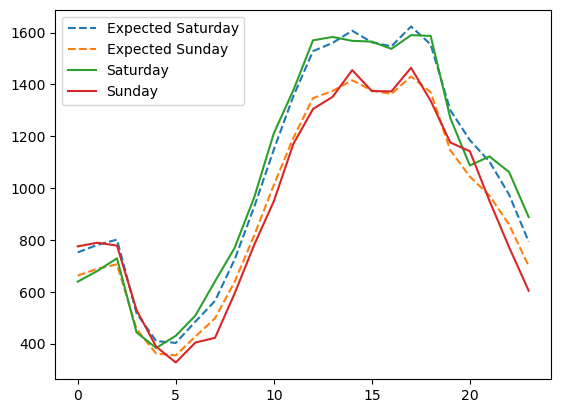

1.2545552084147115e-33

In [40]:
pval, contribs = chisquare(injury_crashes, ['Saturday', 'Sunday'], plot_expected=True)
pval

In [34]:
pval, contribs = chisquare(injury_crashes, ['Tuesday', 'Wednesday'], False)
pval

0.07740914208619751

In [35]:
pval, contribs = chisquare(injury_crashes, ['Tuesday', 'Thursday'], False)
pval

7.74202088431147e-08

In [37]:
pval, contribs = chisquare(fatal_crashes, ['Tuesday', 'Wednesday'], False)
pval

0.28681278335892824

In [41]:
pval, contribs = chisquare(fatal_crashes, ['Saturday', 'Wednesday'], False)
pval

0.013920716971079557

todo: write summary of these results?